**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

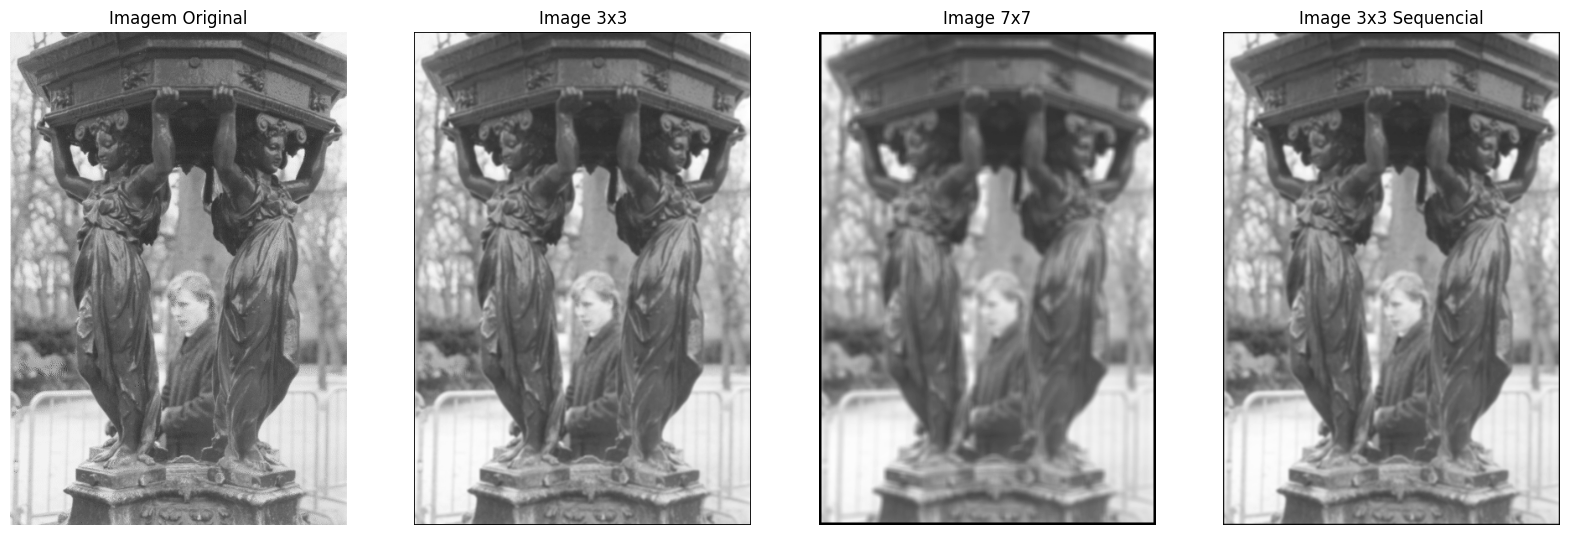

In [67]:

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Imagem Original")

def image_blur(img, _kernel_size):
    width, height = img.shape

    kernel_size = _kernel_size
    half_kernel = kernel_size // 2
    new_img = np.zeros_like(img)

    for i in range(half_kernel, width - half_kernel):
        for j in range(half_kernel, height - half_kernel):
            pixels = img[i - half_kernel: i + half_kernel + 1, j - half_kernel: j + half_kernel + 1]
            new_pixel = np.mean(pixels)
            new_img[i, j] = new_pixel
    return new_img

img3x3 = image_blur(img1,3)
img7x7 = image_blur(img1,7)
img3x3_twice = image_blur(img3x3,3)

images = [img3x3, img7x7, img3x3_twice]
labels = ["3x3", "7x7", "3x3 Sequencial"]
for i in range(2,len(images)+2):
    plt.subplot(1,4,i)
    plt.imshow(images[i - 2], cmap="gray")
    plt.title(f"Image {labels[i - 2]}")
    plt.axis("off")
    
plt.show()

        

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

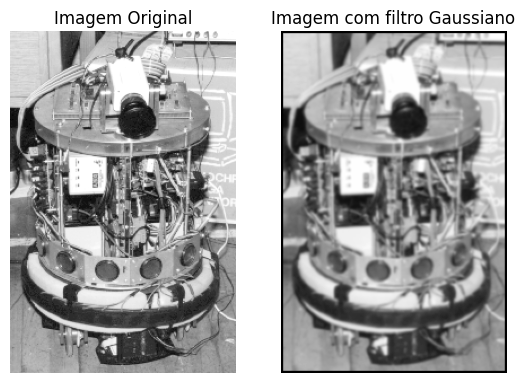

In [93]:
import math

def gaussian_kernel(size, sigma):# implementacao da formula gaussiana com lambda
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * math.pi * sigma ** 2)) * np.exp(-((x - size // 2) ** 2 + (y - size // 2) ** 2) / (2 * sigma ** 2)),(size, size)
    )
    return kernel / np.sum(kernel)

def gaussian_blur(img, kernel_size):
    sigma = {
        5: 1,
        9: 2,
        15: 4
    }.get(kernel_size, 0)

    if sigma == 0:
        print("Kernel com tamanho invalido, use 5, 9, ou 15")

    kernel = gaussian_kernel(kernel_size, sigma)
    half_kernel = kernel_size // 2
    width, height = img.shape
    new_img = np.zeros_like(img)
    
    for i in range(half_kernel, width - half_kernel):
        for j in range(half_kernel, height - half_kernel):
            kernel_region = img[i - half_kernel:i + half_kernel + 1, j - half_kernel:j + half_kernel + 1]
            new_img[i, j] = np.sum(kernel * kernel_region) # multiplicacao dos valores da regiao do kernel pelo kernel gaussiano
    return new_img

img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.axis("off")

img_gaussian = gaussian_blur(img2, 5)
plt.subplot(1,2,2)
plt.imshow(img_gaussian, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com filtro Gaussiano")
plt.axis("off")
plt.show()


3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

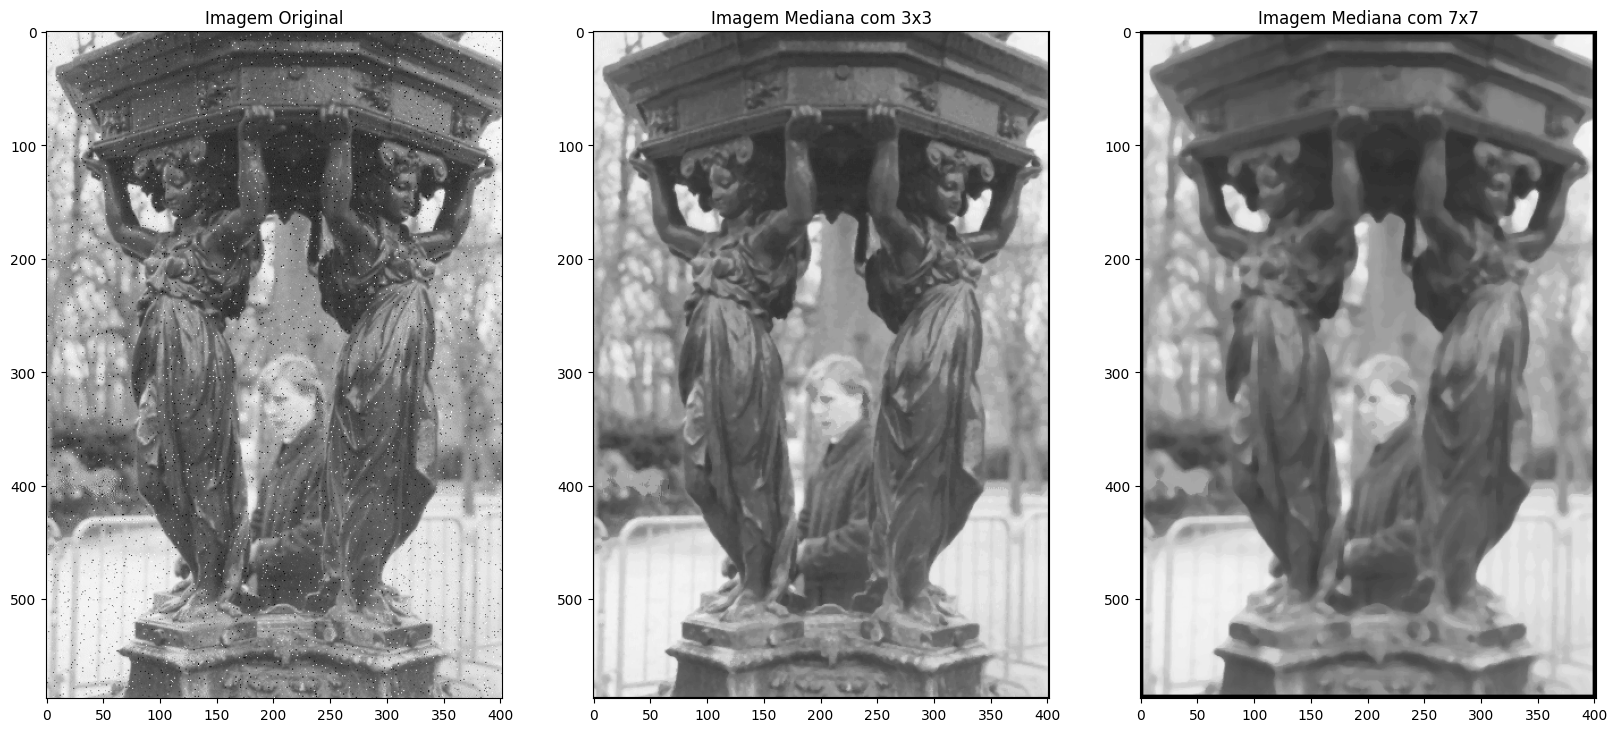

In [100]:
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

def median_filter(img, _kernel_size):
    width, height = img.shape

    kernel_size = _kernel_size
    half_kernel = kernel_size // 2
    new_img = np.zeros_like(img)

    for i in range(half_kernel, width - half_kernel):
        for j in range(half_kernel, height - half_kernel):
            pixels = img[i - half_kernel: i + half_kernel + 1, j - half_kernel: j + half_kernel + 1]

            pixels_flattened = pixels.flatten()
            pixels_sorted = np.sort(pixels_flattened)

            median = pixels_sorted[len(pixels_sorted) // 2]
            new_img[i, j] = median
    return new_img


plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Imagem Original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

img3x3 = median_filter(img3,3)
plt.subplot(1,3,2)
plt.title("Imagem Mediana com 3x3")
plt.imshow(img3x3, cmap='gray', vmin=0, vmax=255)

img7x7 = median_filter(img3,7)
plt.subplot(1,3,3)
plt.title("Imagem Mediana com 7x7")
plt.imshow(img7x7, cmap='gray', vmin=0, vmax=255)

plt.show()

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

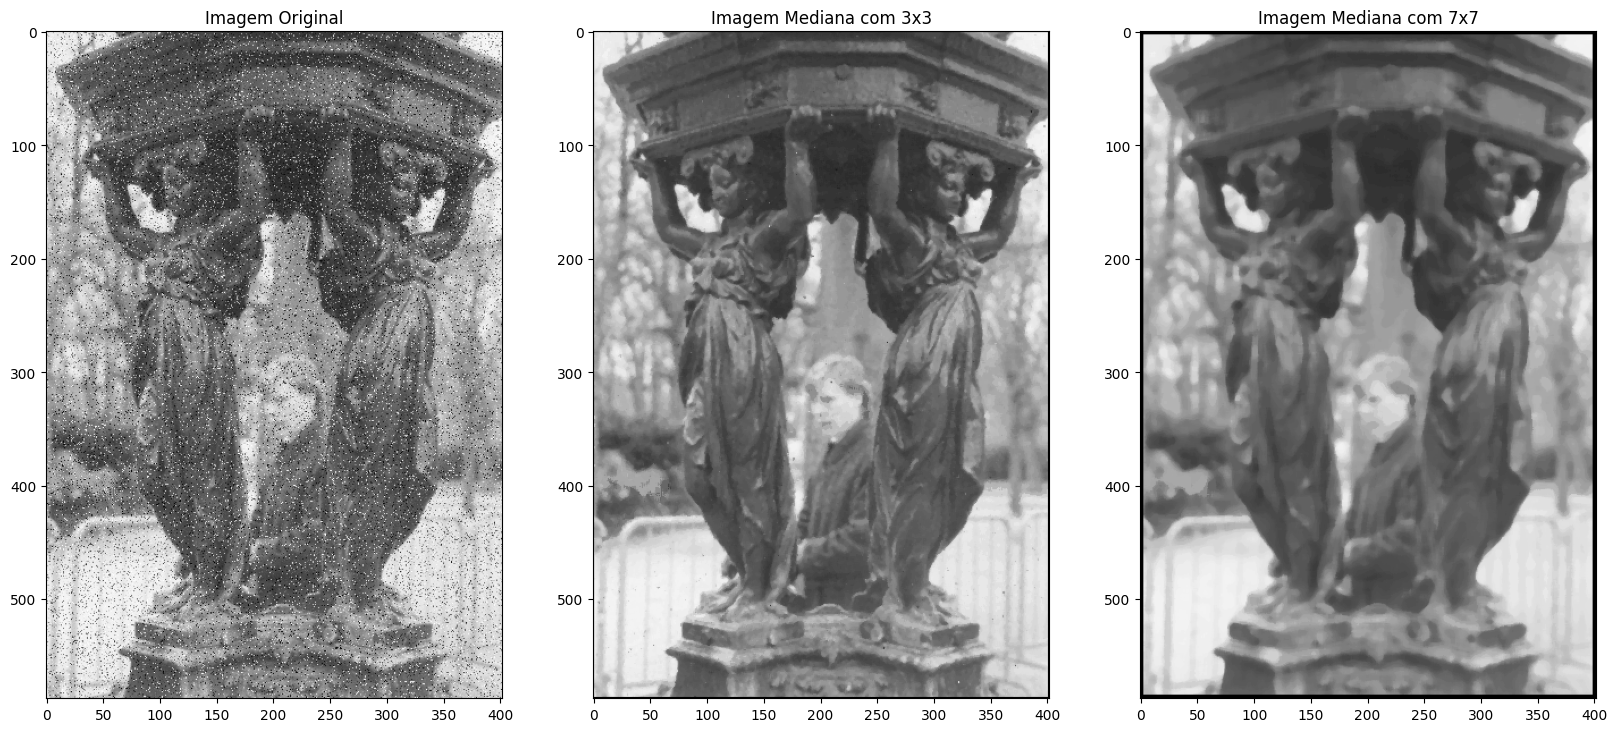

In [101]:
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Imagem Original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

img3x3 = median_filter(img3,3)
plt.subplot(1,3,2)
plt.title("Imagem Mediana com 3x3")
plt.imshow(img3x3, cmap='gray', vmin=0, vmax=255)

img7x7 = median_filter(img3,7)
plt.subplot(1,3,3)
plt.title("Imagem Mediana com 7x7")
plt.imshow(img7x7, cmap='gray', vmin=0, vmax=255)

plt.show()